In [283]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sqlalchemy import create_engine
import datetime
import seaborn as sns

In [14]:
#initialise the number of weeks for the dataset
num_weeks = 14 #13

#initialise the date for the first week of the dataset (week ending on start_date)
start_date = filedate = pd.Timestamp('2019-10-05 00:00:00')

#initialise the regex for the MTA turnstile url
filename_regex = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"

filelist = []

for numfiles in range (num_weeks):

    # create the appropriate filename for the week
    filedate_str = str(filedate.year)[2:4] + str(filedate.month).zfill(2) + str(filedate.day).zfill(2)
    filename = filename_regex.format(filedate_str)

    # read the file and append it to the list of files to be concacated
    df = pd.read_csv(filename, parse_dates=['DATE'], keep_date_col=True)
    filelist.append(df)

    # advance to the next week
    filedate += pd.Timedelta(days=7)

mta_test = pd.concat(filelist, axis=0, ignore_index=True)
mta_test.rename(columns={'EXITS                                                               ':'EXITS'}, inplace=True)

col = ['STATION','C/A','UNIT','SCP','DATE','TIME']
## gets the number of entries and exits
# mta_entries = mta_test.groupby(col).ENTRIES.max() - mta_test.groupby(col).ENTRIES.min()
# mta_exits = mta_test.groupby(col).EXITS.max() - mta_test.groupby(col).EXITS.min()

# ## flattens the data
# mta_entries_flat = mta_entries.reset_index()
# mta_exits_flat = mta_exits.reset_index()

# mta_entries_exits = pd.merge(mta_entries_flat, mta_exits_flat, how='outer')
mta_entries_exits = mta_test
mta_entries_exits

C/A  UNIT       SCP        STATION LINENAME DIVISION       DATE  \
0         A002  R051  02-00-00          59 ST  NQR456W      BMT 2019-09-28   
1         A002  R051  02-00-00          59 ST  NQR456W      BMT 2019-09-28   
2         A002  R051  02-00-00          59 ST  NQR456W      BMT 2019-09-28   
3         A002  R051  02-00-00          59 ST  NQR456W      BMT 2019-09-28   
4         A002  R051  02-00-00          59 ST  NQR456W      BMT 2019-09-28   
...        ...   ...       ...            ...      ...      ...        ...   
2887514  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT 2020-01-03   
2887515  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT 2020-01-03   
2887516  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT 2020-01-03   
2887517  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT 2020-01-03   
2887518  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT 2020-01-03   

             TIME     DESC  ENTRIES    EXITS  
0        00:00:00  REGULAR  7215740  2444319  
1        04:00:00  REGULAR  7215766  2444322  
2        08:00:00  REGULAR  7215788  2444357  
3        12:00:00  REGULAR  7215862  2444436  
4        16:00:00  REGULAR  7216108  2444474  
...           ...      ...      ...      ...  
2887514  04:00:00  REGULAR     5554      420  
2887515  08:00:00  REGULAR     5554      420  
2887516  12:00:00  REGULAR     5554      420  
2887517  16:00:00  REGULAR     5554      420  
2887518  20:00:00  REGULAR     5554      420  

[2887519 rows x 11 columns]

In [15]:
mta_entries_exits.sort_values("ENTRIES")

C/A  UNIT       SCP        STATION LINENAME DIVISION       DATE  \
1693927  N002A  R173  00-05-01  INWOOD-207 ST        A      IND 2019-11-29   
764982    R169  R168  01-05-01          96 ST      123      IRT 2019-10-19   
764983    R169  R168  01-05-01          96 ST      123      IRT 2019-10-19   
764984    R169  R168  01-05-01          96 ST      123      IRT 2019-10-19   
764985    R169  R168  01-05-01          96 ST      123      IRT 2019-10-19   
...        ...   ...       ...            ...      ...      ...        ...   
57079     N078  R175  01-00-03          14 ST     ACEL      IND 2019-09-28   
57078     N078  R175  01-00-03          14 ST     ACEL      IND 2019-09-28   
57077     N078  R175  01-00-03          14 ST     ACEL      IND 2019-09-28   
57076     N078  R175  01-00-03          14 ST     ACEL      IND 2019-09-28   
57075     N078  R175  01-00-03          14 ST     ACEL      IND 2019-09-28   

             TIME     DESC     ENTRIES       EXITS  
1693927  16:00:00  REGULAR           0         605  
764982   05:00:00  REGULAR           0        1598  
764983   09:00:00  REGULAR           0        1598  
764984   13:00:00  REGULAR           0        1598  
764985   17:00:00  REGULAR           0        1598  
...           ...      ...         ...         ...  
57079    17:00:00  REGULAR  2129063988  1155390244  
57078    13:00:00  REGULAR  2129064411  1155390900  
57077    09:00:00  REGULAR  2129064571  1155391412  
57076    05:00:00  REGULAR  2129064604  1155391548  
57075    01:00:00  REGULAR  2129064671  1155391565  

[2887519 rows x 11 columns]

In [16]:
## append weekday and traffic column to dataset
mta_entries_exits['WEEKDAY'] = mta_entries_exits['DATE'].dt.day_name()
# mta_entries_exits['TRAFFIC'] = mta_entries_exits['ENTRIES'] + mta_entries_exits['EXITS']
mta_entries_exits['WEEKDAY_INDEX'] = mta_entries_exits['DATE'].dt.weekday

# mta_entries_exits.sort_values(by="TRAFFIC")

mta_entries_exits[["PREV_DATE", "PREV_ENTRIES"]] = (mta_entries_exits
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))
# mta_entries_exits.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0?
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_entries_exits["DAILY_ENTRIES"] = mta_entries_exits.apply(get_daily_counts, axis=1, max_counter=1000000)
mta_entries_exits[mta_entries_exits["ENTRIES"] < mta_entries_exits["PREV_ENTRIES"]]
# # to int
#mta_entries_exits["PREV_ENTRIES"] = mta_entries_exits["PREV_ENTRIES"].astype('int64')
#mta_entries_exits["DAILY_ENTRIES"] = mta_entries_exits["DAILY_ENTRIES"].astype('int64')
# mta_entries_exits.to_csv('out.csv', index=False)
mta_entries_exits

<ipython-input-16-1e4bf0b74865>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_entries_exits[["PREV_DATE", "PREV_ENTRIES"]] = (mta_entries_exits


C/A  UNIT       SCP        STATION LINENAME DIVISION       DATE  \
0         A002  R051  02-00-00          59 ST  NQR456W      BMT 2019-09-28   
1         A002  R051  02-00-00          59 ST  NQR456W      BMT 2019-09-28   
2         A002  R051  02-00-00          59 ST  NQR456W      BMT 2019-09-28   
3         A002  R051  02-00-00          59 ST  NQR456W      BMT 2019-09-28   
4         A002  R051  02-00-00          59 ST  NQR456W      BMT 2019-09-28   
...        ...   ...       ...            ...      ...      ...        ...   
2887514  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT 2020-01-03   
2887515  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT 2020-01-03   
2887516  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT 2020-01-03   
2887517  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT 2020-01-03   
2887518  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT 2020-01-03   

             TIME     DESC  ENTRIES    EXITS   WEEKDAY  WEEKDAY_INDEX  \
0        00:00:00  REGULAR  7215740  2444319  Saturday              5   
1        04:00:00  REGULAR  7215766  2444322  Saturday              5   
2        08:00:00  REGULAR  7215788  2444357  Saturday              5   
3        12:00:00  REGULAR  7215862  2444436  Saturday              5   
4        16:00:00  REGULAR  7216108  2444474  Saturday              5   
...           ...      ...      ...      ...       ...            ...   
2887514  04:00:00  REGULAR     5554      420    Friday              4   
2887515  08:00:00  REGULAR     5554      420    Friday              4   
2887516  12:00:00  REGULAR     5554      420    Friday              4   
2887517  16:00:00  REGULAR     5554      420    Friday              4   
2887518  20:00:00  REGULAR     5554      420    Friday              4   

         PREV_DATE  PREV_ENTRIES  DAILY_ENTRIES  
0              NaT           NaN            NaN  
1       2019-09-28     7215740.0           26.0  
2       2019-09-28     7215766.0           22.0  
3       2019-09-28     7215788.0           74.0  
4       2019-09-28     7215862.0          246.0  
...            ...           ...            ...  
2887514 2020-01-03        5554.0            0.0  
2887515 2020-01-03        5554.0            0.0  
2887516 2020-01-03        5554.0            0.0  
2887517 2020-01-03        5554.0            0.0  
2887518 2020-01-03        5554.0            0.0  

[2887519 rows x 16 columns]

In [167]:
# mta_entries_exits= mta_entries_exits[mta_entries_exits['ENTRIES'] != 0]
# mta_entries_exits.drop(mta_entries_exits.index[mta_entries_exits['ENTRIES'] == 0], inplace = True)
# mta_entries_exits

In [17]:
mta_entries_exits.DATE = mta_entries_exits['DATE'].astype('str')
mta_entries_exits.info()
mta_entries_exits

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887519 entries, 0 to 2887518
Data columns (total 16 columns):
 #   Column         Dtype         
---  ------         -----         
 0   C/A            object        
 1   UNIT           object        
 2   SCP            object        
 3   STATION        object        
 4   LINENAME       object        
 5   DIVISION       object        
 6   DATE           object        
 7   TIME           object        
 8   DESC           object        
 9   ENTRIES        int64         
 10  EXITS          int64         
 11  WEEKDAY        object        
 12  WEEKDAY_INDEX  int64         
 13  PREV_DATE      datetime64[ns]
 14  PREV_ENTRIES   float64       
 15  DAILY_ENTRIES  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(10)
memory usage: 352.5+ MB


C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0         A002  R051  02-00-00          59 ST  NQR456W      BMT  2019-09-28   
1         A002  R051  02-00-00          59 ST  NQR456W      BMT  2019-09-28   
2         A002  R051  02-00-00          59 ST  NQR456W      BMT  2019-09-28   
3         A002  R051  02-00-00          59 ST  NQR456W      BMT  2019-09-28   
4         A002  R051  02-00-00          59 ST  NQR456W      BMT  2019-09-28   
...        ...   ...       ...            ...      ...      ...         ...   
2887514  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  2020-01-03   
2887515  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  2020-01-03   
2887516  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  2020-01-03   
2887517  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  2020-01-03   
2887518  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  2020-01-03   

             TIME     DESC  ENTRIES    EXITS   WEEKDAY  WEEKDAY_INDEX  \
0        00:00:00  REGULAR  7215740  2444319  Saturday              5   
1        04:00:00  REGULAR  7215766  2444322  Saturday              5   
2        08:00:00  REGULAR  7215788  2444357  Saturday              5   
3        12:00:00  REGULAR  7215862  2444436  Saturday              5   
4        16:00:00  REGULAR  7216108  2444474  Saturday              5   
...           ...      ...      ...      ...       ...            ...   
2887514  04:00:00  REGULAR     5554      420    Friday              4   
2887515  08:00:00  REGULAR     5554      420    Friday              4   
2887516  12:00:00  REGULAR     5554      420    Friday              4   
2887517  16:00:00  REGULAR     5554      420    Friday              4   
2887518  20:00:00  REGULAR     5554      420    Friday              4   

         PREV_DATE  PREV_ENTRIES  DAILY_ENTRIES  
0              NaT           NaN            NaN  
1       2019-09-28     7215740.0           26.0  
2       2019-09-28     7215766.0           22.0  
3       2019-09-28     7215788.0           74.0  
4       2019-09-28     7215862.0          246.0  
...            ...           ...            ...  
2887514 2020-01-03        5554.0            0.0  
2887515 2020-01-03        5554.0            0.0  
2887516 2020-01-03        5554.0            0.0  
2887517 2020-01-03        5554.0            0.0  
2887518 2020-01-03        5554.0            0.0  

[2887519 rows x 16 columns]

In [18]:
mta_entries_exits["DATE_TIME"] = pd.to_datetime(mta_entries_exits.DATE + " " + mta_entries_exits.TIME, 
                                            format="%Y-%m-%d %H:%M:%S")

In [19]:
mta_entries_exits

C/A  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0         A002  R051  02-00-00          59 ST  NQR456W      BMT  2019-09-28   
1         A002  R051  02-00-00          59 ST  NQR456W      BMT  2019-09-28   
2         A002  R051  02-00-00          59 ST  NQR456W      BMT  2019-09-28   
3         A002  R051  02-00-00          59 ST  NQR456W      BMT  2019-09-28   
4         A002  R051  02-00-00          59 ST  NQR456W      BMT  2019-09-28   
...        ...   ...       ...            ...      ...      ...         ...   
2887514  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  2020-01-03   
2887515  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  2020-01-03   
2887516  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  2020-01-03   
2887517  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  2020-01-03   
2887518  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  2020-01-03   

             TIME     DESC  ENTRIES    EXITS   WEEKDAY  WEEKDAY_INDEX  \
0        00:00:00  REGULAR  7215740  2444319  Saturday              5   
1        04:00:00  REGULAR  7215766  2444322  Saturday              5   
2        08:00:00  REGULAR  7215788  2444357  Saturday              5   
3        12:00:00  REGULAR  7215862  2444436  Saturday              5   
4        16:00:00  REGULAR  7216108  2444474  Saturday              5   
...           ...      ...      ...      ...       ...            ...   
2887514  04:00:00  REGULAR     5554      420    Friday              4   
2887515  08:00:00  REGULAR     5554      420    Friday              4   
2887516  12:00:00  REGULAR     5554      420    Friday              4   
2887517  16:00:00  REGULAR     5554      420    Friday              4   
2887518  20:00:00  REGULAR     5554      420    Friday              4   

         PREV_DATE  PREV_ENTRIES  DAILY_ENTRIES           DATE_TIME  
0              NaT           NaN            NaN 2019-09-28 00:00:00  
1       2019-09-28     7215740.0           26.0 2019-09-28 04:00:00  
2       2019-09-28     7215766.0           22.0 2019-09-28 08:00:00  
3       2019-09-28     7215788.0           74.0 2019-09-28 12:00:00  
4       2019-09-28     7215862.0          246.0 2019-09-28 16:00:00  
...            ...           ...            ...                 ...  
2887514 2020-01-03        5554.0            0.0 2020-01-03 04:00:00  
2887515 2020-01-03        5554.0            0.0 2020-01-03 08:00:00  
2887516 2020-01-03        5554.0            0.0 2020-01-03 12:00:00  
2887517 2020-01-03        5554.0            0.0 2020-01-03 16:00:00  
2887518 2020-01-03        5554.0            0.0 2020-01-03 20:00:00  

[2887519 rows x 17 columns]

In [20]:
mta_entries_exits.index = mta_entries_exits['DATE_TIME']
mta_entries_exits.index = pd.to_datetime(mta_entries_exits.index)
mta_entries_exits

C/A  UNIT       SCP        STATION LINENAME DIVISION  \
DATE_TIME                                                                     
2019-09-28 00:00:00   A002  R051  02-00-00          59 ST  NQR456W      BMT   
2019-09-28 04:00:00   A002  R051  02-00-00          59 ST  NQR456W      BMT   
2019-09-28 08:00:00   A002  R051  02-00-00          59 ST  NQR456W      BMT   
2019-09-28 12:00:00   A002  R051  02-00-00          59 ST  NQR456W      BMT   
2019-09-28 16:00:00   A002  R051  02-00-00          59 ST  NQR456W      BMT   
...                    ...   ...       ...            ...      ...      ...   
2020-01-03 04:00:00  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
2020-01-03 08:00:00  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
2020-01-03 12:00:00  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
2020-01-03 16:00:00  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   
2020-01-03 20:00:00  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT   

                           DATE      TIME     DESC  ENTRIES    EXITS  \
DATE_TIME                                                              
2019-09-28 00:00:00  2019-09-28  00:00:00  REGULAR  7215740  2444319   
2019-09-28 04:00:00  2019-09-28  04:00:00  REGULAR  7215766  2444322   
2019-09-28 08:00:00  2019-09-28  08:00:00  REGULAR  7215788  2444357   
2019-09-28 12:00:00  2019-09-28  12:00:00  REGULAR  7215862  2444436   
2019-09-28 16:00:00  2019-09-28  16:00:00  REGULAR  7216108  2444474   
...                         ...       ...      ...      ...      ...   
2020-01-03 04:00:00  2020-01-03  04:00:00  REGULAR     5554      420   
2020-01-03 08:00:00  2020-01-03  08:00:00  REGULAR     5554      420   
2020-01-03 12:00:00  2020-01-03  12:00:00  REGULAR     5554      420   
2020-01-03 16:00:00  2020-01-03  16:00:00  REGULAR     5554      420   
2020-01-03 20:00:00  2020-01-03  20:00:00  REGULAR     5554      420   

                      WEEKDAY  WEEKDAY_INDEX  PREV_DATE  PREV_ENTRIES  \
DATE_TIME                                                               
2019-09-28 00:00:00  Saturday              5        NaT           NaN   
2019-09-28 04:00:00  Saturday              5 2019-09-28     7215740.0   
2019-09-28 08:00:00  Saturday              5 2019-09-28     7215766.0   
2019-09-28 12:00:00  Saturday              5 2019-09-28     7215788.0   
2019-09-28 16:00:00  Saturday              5 2019-09-28     7215862.0   
...                       ...            ...        ...           ...   
2020-01-03 04:00:00    Friday              4 2020-01-03        5554.0   
2020-01-03 08:00:00    Friday              4 2020-01-03        5554.0   
2020-01-03 12:00:00    Friday              4 2020-01-03        5554.0   
2020-01-03 16:00:00    Friday              4 2020-01-03        5554.0   
2020-01-03 20:00:00    Friday              4 2020-01-03        5554.0   

                     DAILY_ENTRIES           DATE_TIME  
DATE_TIME                                               
2019-09-28 00:00:00            NaN 2019-09-28 00:00:00  
2019-09-28 04:00:00           26.0 2019-09-28 04:00:00  
2019-09-28 08:00:00           22.0 2019-09-28 08:00:00  
2019-09-28 12:00:00           74.0 2019-09-28 12:00:00  
2019-09-28 16:00:00          246.0 2019-09-28 16:00:00  
...                            ...                 ...  
2020-01-03 04:00:00            0.0 2020-01-03 04:00:00  
2020-01-03 08:00:00            0.0 2020-01-03 08:00:00  
2020-01-03 12:00:00            0.0 2020-01-03 12:00:00  
2020-01-03 16:00:00            0.0 2020-01-03 16:00:00  
2020-01-03 20:00:00            0.0 2020-01-03 20:00:00  

[2887519 rows x 17 columns]

In [21]:
#to get all stations traffic for one day
total_daily_traffic=mta_entries_exits.resample('1D')['DAILY_ENTRIES'].sum()
total_daily_traffic

DATE_TIME
2019-09-28    3559815.0
2019-09-29    2821091.0
2019-09-30    6076724.0
2019-10-01    5537933.0
2019-10-02    6328860.0
                ...    
2019-12-30    4568208.0
2019-12-31    4916646.0
2020-01-01    2843599.0
2020-01-02    5255945.0
2020-01-03    6000774.0
Freq: D, Name: DAILY_ENTRIES, Length: 98, dtype: float64

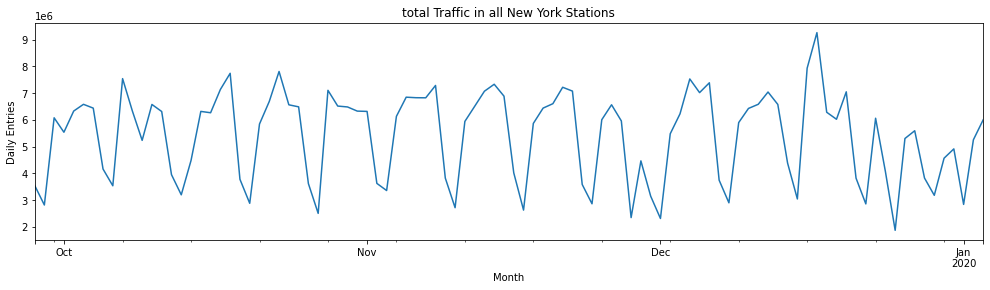

In [27]:
plt.figure(figsize=(17,4))
line = total_daily_traffic.plot( kind = 'line', title = 'total Traffic in all New York Stations')
line.set_xlabel("Month")
line.set_ylabel("Daily Entries")
plt.show()

#### the above plot shows the daily traffic in all New York from October to the December where you can notice a peak at the end of the graph where the holiday season is

In [116]:
# engine = create_engine("sqlite:///D:/Desktop/MTA Project/NYC_Attractions.db")
engine = create_engine("sqlite:///NYC_Attractions.db")

In [117]:
all_tables = engine.table_names()
all_tables

['Attractions_Stations', 'attraction_filtered']

In [118]:
attractions = pd.read_sql('SELECT * FROM Attractions_Stations;', engine)
attractions

Attraction                               Stations        lat        lon
0   Central Park  81 STREET - MUSEUM OF NATURAL HISTORY  40.781990 -73.972002
1   Central Park                                  86 ST  40.777729 -73.951573
2   Central Park                            86TH STREET  40.779481 -73.955626
3   Central Park                                  72 ST  40.776209 -73.976197
4   Central Park                                  77 ST  40.773625 -73.959846
..           ...                                    ...        ...        ...
61  Times Square    42 ST - PORT AUTHORITY BUS TERMINAL  40.756741 -73.990447
62  Times Square                                   5 AV  40.753972 -73.982296
63  Times Square               34 STREET - PENN STATION  40.752273 -73.993428
64  Times Square       34 ST - HERALD SQ SUBWAY STATION  40.750056 -73.988114
65  Times Square              47-50 STS-ROCKEFELLER CTR  40.758833 -73.981136

[66 rows x 4 columns]

In [119]:
attractions = pd.read_sql('SELECT Attraction AS ATTRACTION, UPPER(Stations) AS STATION, lat AS LAT, lon AS LON FROM Attractions_Stations;', engine)
attractions

ATTRACTION                                STATION        LAT        LON
0   Central Park  81 STREET - MUSEUM OF NATURAL HISTORY  40.781990 -73.972002
1   Central Park                                  86 ST  40.777729 -73.951573
2   Central Park                            86TH STREET  40.779481 -73.955626
3   Central Park                                  72 ST  40.776209 -73.976197
4   Central Park                                  77 ST  40.773625 -73.959846
..           ...                                    ...        ...        ...
61  Times Square    42 ST - PORT AUTHORITY BUS TERMINAL  40.756741 -73.990447
62  Times Square                                   5 AV  40.753972 -73.982296
63  Times Square               34 STREET - PENN STATION  40.752273 -73.993428
64  Times Square       34 ST - HERALD SQ SUBWAY STATION  40.750056 -73.988114
65  Times Square              47-50 STS-ROCKEFELLER CTR  40.758833 -73.981136

[66 rows x 4 columns]

In [120]:
attraction_station_traffic = pd.merge(left = attractions, right = mta_entries_exits, how = 'inner', on = 'STATION' )
attraction_station_traffic

ATTRACTION         STATION        LAT        LON   C/A  UNIT  \
0       Central Park           86 ST  40.777729 -73.951573  C025  R215   
1       Central Park           86 ST  40.777729 -73.951573  C025  R215   
2       Central Park           86 ST  40.777729 -73.951573  C025  R215   
3       Central Park           86 ST  40.777729 -73.951573  C025  R215   
4       Central Park           86 ST  40.777729 -73.951573  C025  R215   
...              ...             ...        ...        ...   ...   ...   
427405  Times Square  TIMES SQ-42 ST  40.754539 -73.986672  R151  R033   
427406  Times Square  TIMES SQ-42 ST  40.754539 -73.986672  R151  R033   
427407  Times Square  TIMES SQ-42 ST  40.754539 -73.986672  R151  R033   
427408  Times Square  TIMES SQ-42 ST  40.754539 -73.986672  R151  R033   
427409  Times Square  TIMES SQ-42 ST  40.754539 -73.986672  R151  R033   

             SCP      LINENAME DIVISION        DATE      TIME     DESC  \
0       00-00-00             R      BMT  2019-09-28  00:00:00  REGULAR   
1       00-00-00             R      BMT  2019-09-28  04:00:00  REGULAR   
2       00-00-00             R      BMT  2019-09-28  08:00:00  REGULAR   
3       00-00-00             R      BMT  2019-09-28  12:00:00  REGULAR   
4       00-00-00             R      BMT  2019-09-28  16:00:00  REGULAR   
...          ...           ...      ...         ...       ...      ...   
427405  00-00-08  1237ACENQRSW      IRT  2020-01-03  07:00:00  REGULAR   
427406  00-00-08  1237ACENQRSW      IRT  2020-01-03  11:00:00  REGULAR   
427407  00-00-08  1237ACENQRSW      IRT  2020-01-03  15:00:00  REGULAR   
427408  00-00-08  1237ACENQRSW      IRT  2020-01-03  19:00:00  REGULAR   
427409  00-00-08  1237ACENQRSW      IRT  2020-01-03  23:00:00  REGULAR   

        ENTRIES    EXITS   WEEKDAY  WEEKDAY_INDEX  PREV_DATE  PREV_ENTRIES  \
0        123373   107435  Saturday              5        NaT           NaN   
1        123413   107647  Saturday              5 2019-09-28      123373.0   
2        123702   107813  Saturday              5 2019-09-28      123413.0   
3        124273   108150  Saturday              5 2019-09-28      123702.0   
4        124862   108575  Saturday              5 2019-09-28      124273.0   
...         ...      ...       ...            ...        ...           ...   
427405  8719222  2800053    Friday              4 2020-01-03     8718999.0   
427406  8719942  2800294    Friday              4 2020-01-03     8719222.0   
427407  8720443  2800482    Friday              4 2020-01-03     8719942.0   
427408  8721314  2800787    Friday              4 2020-01-03     8720443.0   
427409  8722105  2800963    Friday              4 2020-01-03     8721314.0   

        DAILY_ENTRIES           DATE_TIME  
0                 NaN 2019-09-28 00:00:00  
1                40.0 2019-09-28 04:00:00  
2               289.0 2019-09-28 08:00:00  
3               571.0 2019-09-28 12:00:00  
4               589.0 2019-09-28 16:00:00  
...               ...                 ...  
427405          223.0 2020-01-03 07:00:00  
427406          720.0 2020-01-03 11:00:00  
427407          501.0 2020-01-03 15:00:00  
427408          871.0 2020-01-03 19:00:00  
427409          791.0 2020-01-03 23:00:00  

[427410 rows x 20 columns]

In [123]:
attraction_station_traffic.to_sql("attraction_filtered", con=engine)

In [124]:
attraction_names = pd.read_sql('select DISTINCT ATTRACTION from attraction_filtered;', engine)
attraction_names

ATTRACTION
0                                       Central Park
1                        Metropolitan Museum of Art 
2                                  Statue of Liberty
3  Rockefeller Center & Top of the Rock Observati...
4                  Broadway and the Theater District
5                              Empire State Building
6                                       Times Square

In [125]:
tmpList = []
for index, row in attraction_names.iterrows():
    tmpList.append(pd.read_sql(f'select * from attraction_filtered where ATTRACTION = "{row.ATTRACTION}";', engine))

In [126]:
for i in tmpList:
    i.index = i['DATE_TIME']
    i.index = pd.to_datetime(i.index)

In [127]:
tmpListTraffic = []
for i in tmpList:
    tmpListTraffic.append(i.resample('1D')['DAILY_ENTRIES'].sum())

In [128]:
tmpTraffic = []
tmpDateTime = []
for i in tmpListTraffic:
    tmpT = []
    tmpD = []
    for index, row in i.items():
        tmpT.append(int(row))
        tmpD.append(str(index)[:10])
    tmpDateTime.append(tmpD)
    tmpTraffic.append(tmpT)

In [129]:
tmpDf = []
for i in range(len(tmpList)):
    tmpDf.append(pd.DataFrame({'Attraction': [attraction_names['ATTRACTION'][i] for x in range(len(tmpDateTime[0]))], 'Date': tmpDateTime[i], 'Daily Entries': tmpTraffic[i]})) 

In [130]:
for i in tmpDf:
    i['Date']= pd.to_datetime(i['Date'])
    i['Weekday'] = i['Date'].dt.day_name()

In [244]:
central_park = tmpDf[0]
museum = tmpDf[1]
liberty = tmpDf[2]
rockefeller=tmpDf[3]
broadway = tmpDf[4]
empire = tmpDf[5]
timesquare = tmpDf[6]

In [293]:
central_park

Attraction       Date  Daily Entries    Weekday
0   Central Park 2019-09-28         325514   Saturday
1   Central Park 2019-09-29         246670     Sunday
2   Central Park 2019-09-30         312830     Monday
3   Central Park 2019-10-01         356351    Tuesday
4   Central Park 2019-10-02         409736  Wednesday
..           ...        ...            ...        ...
93  Central Park 2019-12-30         305659     Monday
94  Central Park 2019-12-31         287462    Tuesday
95  Central Park 2020-01-01         171518  Wednesday
96  Central Park 2020-01-02         334241   Thursday
97  Central Park 2020-01-03         344111     Friday

[98 rows x 4 columns]

In [245]:
attraction_traffic_byday = pd.concat([central_park, museum,liberty ,rockefeller ,broadway ,empire, timesquare], axis=0)

In [316]:
attraction_total_traffic = attraction_traffic_byday.groupby(['Attraction'])['Daily Entries'].sum().reset_index()
attraction_total_traffic = attraction_total_traffic.rename(columns={'Daily Entries': 'Traffic'})
attraction_total_traffic

Attraction   Traffic
0                  Broadway and the Theater District   3763332
1                                       Central Park  34850069
2                              Empire State Building  10101152
3                        Metropolitan Museum of Art   25346056
4  Rockefeller Center & Top of the Rock Observati...   3763332
5                                  Statue of Liberty   4127359
6                                       Times Square   8541189

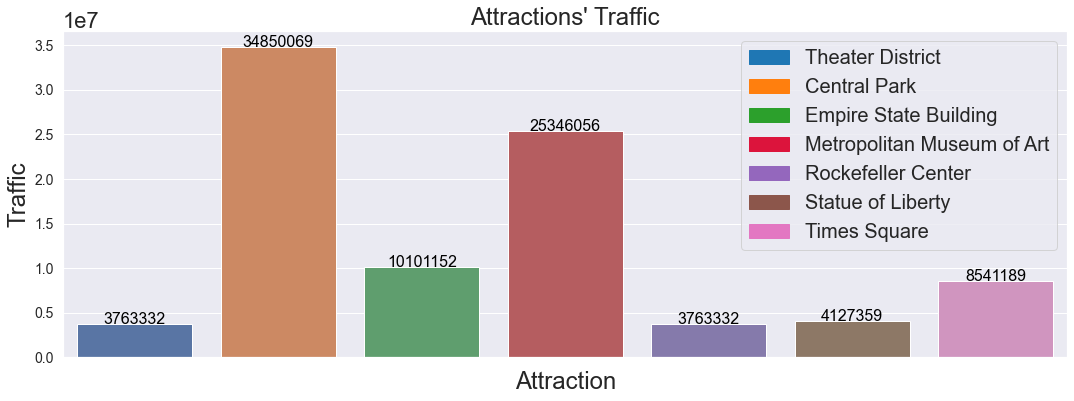

In [325]:
# #at=attraction_total_traffic['Attraction'].value_counts()
# #plt.figure(figsize=(9,6))
# attraction_total_traffic.plot(kind='barh',figsize=(9,5) )
# plt.yticks(fontsize=14, rotation=0)
# positions = (0,1,2,3,4,5)
# labels = ("Broadway", "Central Park", "Empire State Building",'Metropolitan Museum'
#           ,'Rockefeller Center','Statue of Liberty')
# plt.yticks(positions,labels)

# #plt.pie(at)
# #sns.heatmap(attraction_total_traffic,cmap='jet',annot=True);
fig, ax = plt.subplots(figsize=(18,6))
sns.set_style("darkgrid")
b = sns.barplot(x = "Attraction", y = "Traffic", data = attraction_total_traffic)
b.tick_params(labelsize=14)
b.set(xticklabels=[])
bro_color = mpatches.Patch(color='tab:blue', label='Theater District')
cen_color = mpatches.Patch(color='tab:orange', label='Central Park')
emp_color = mpatches.Patch(color='tab:green', label='Empire State Building')
mus_color = mpatches.Patch(color='crimson', label='Metropolitan Museum of Art')
roc_color = mpatches.Patch(color='tab:purple', label='Rockefeller Center')
sta_color = mpatches.Patch(color='tab:brown', label='Statue of Liberty')
tim_color = mpatches.Patch(color='tab:pink', label='Times Square')
plt.legend(handles=[bro_color, cen_color, emp_color, mus_color, roc_color, sta_color, tim_color], prop={'size': 20})
b.set_title('Attractions\' Traffic')
# plt.legend(labels=['legendEntry1', 'legendEntry2', 'legendEntry3'], labelcolor = ["red","red","red"])
for index, row in attraction_total_traffic.iterrows():
    b.text(row.name,row["Traffic"], round(row["Traffic"], 2), color='black', ha="center", fontdict=dict(size=16))

In [ ]:
central_park
museum
liberty
rockefeller
broadway
empire
timesquare

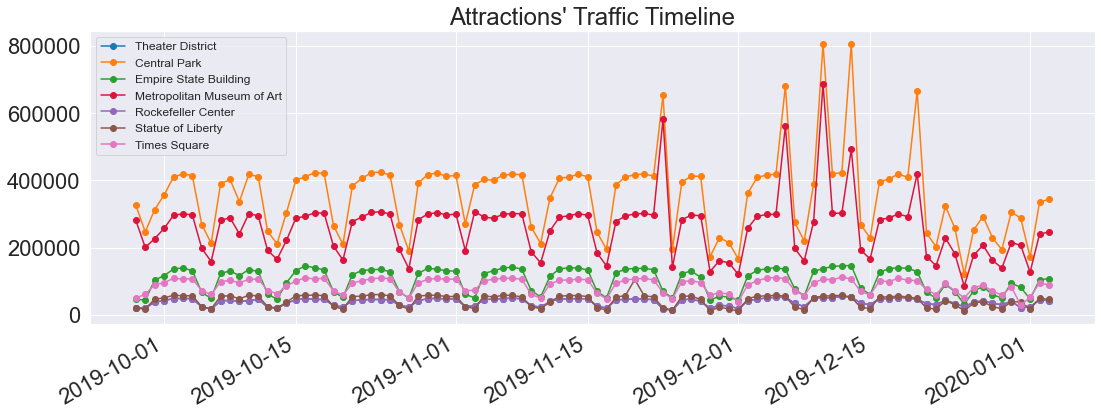

In [326]:
# fig, ax = plt.subplots(figsize=(18,6))
# sns.pointplot(ax=ax, x="Date",y="Daily Entries", data = central_park, color='blue')

f, ax = plt.subplots(1, 1, figsize=(18,6))
x_col='date'
y_col = 'count'
ax.plot_date(broadway.Date, broadway["Daily Entries"], color="tab:blue", label="Theater District", linestyle="-")
ax.plot_date(central_park.Date, central_park["Daily Entries"], color="tab:orange", label="Central Park", linestyle="-")
ax.plot_date(empire.Date, empire["Daily Entries"], color="tab:green", label="Empire State Building", linestyle="-")
ax.plot_date(museum.Date, museum["Daily Entries"], color="crimson", label="Metropolitan Museum of Art", linestyle="-")
ax.plot_date(rockefeller.Date, rockefeller["Daily Entries"], color="tab:purple", label="Rockefeller Center", linestyle="-")
ax.plot_date(liberty.Date, liberty["Daily Entries"], color="tab:brown", label="Statue of Liberty", linestyle="-")
ax.plot_date(timesquare.Date, timesquare["Daily Entries"], color="tab:pink", label="Times Square", linestyle="-")
ax.set_title('Attractions\' Traffic Timeline')
ax.legend(prop={'size': 12}, loc="upper left")

plt.gcf().autofmt_xdate()
plt.show()

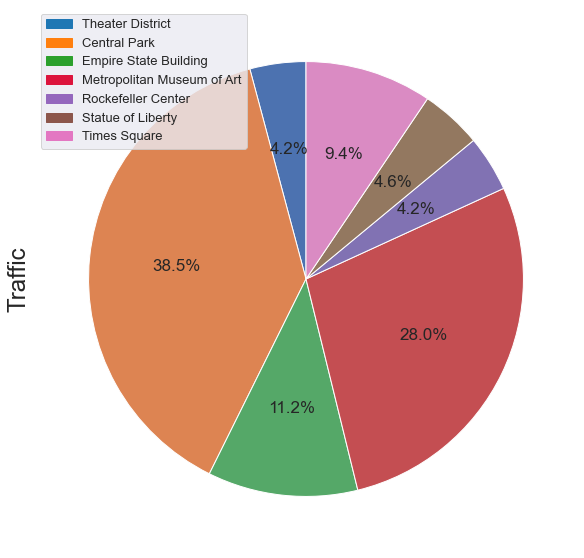

In [348]:
f, ax = plt.subplots(1, 1, figsize=(18,6))
c = attraction_total_traffic.plot.pie(y="Traffic", figsize = (10, 10), autopct="%1.1f%%", startangle=90, labels=None, fontsize=17, ax=ax)
ax.legend(handles=[bro_color, cen_color, emp_color, mus_color, roc_color, sta_color, tim_color], prop={'size': 13})

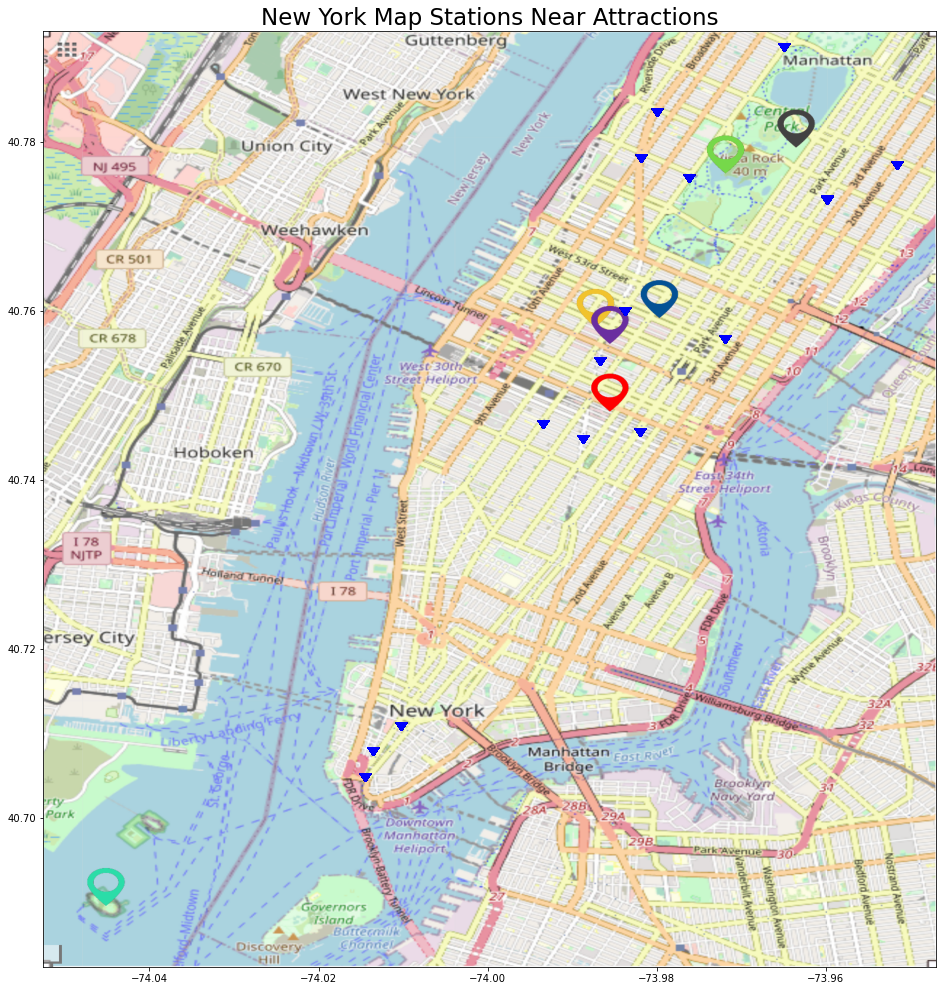

In [160]:
# ny_map = plt.imread('D:\Downloads\Telegram Desktop\juriProject\map.png')
ny_map = plt.imread('main_map2.png')
BBox = ((-74.0526, -73.9470, 40.6824, 40.7931))
fig, ax = plt.subplots(figsize = (16,10))
ax.scatter(attraction_station_traffic.LON, attraction_station_traffic.LAT, zorder=1, alpha= 1, c='b', s=100, marker=11)
ax.set_title('Plotting Spatial Data on New York Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ny_map, zorder=0, extent = BBox, aspect= 'equal')

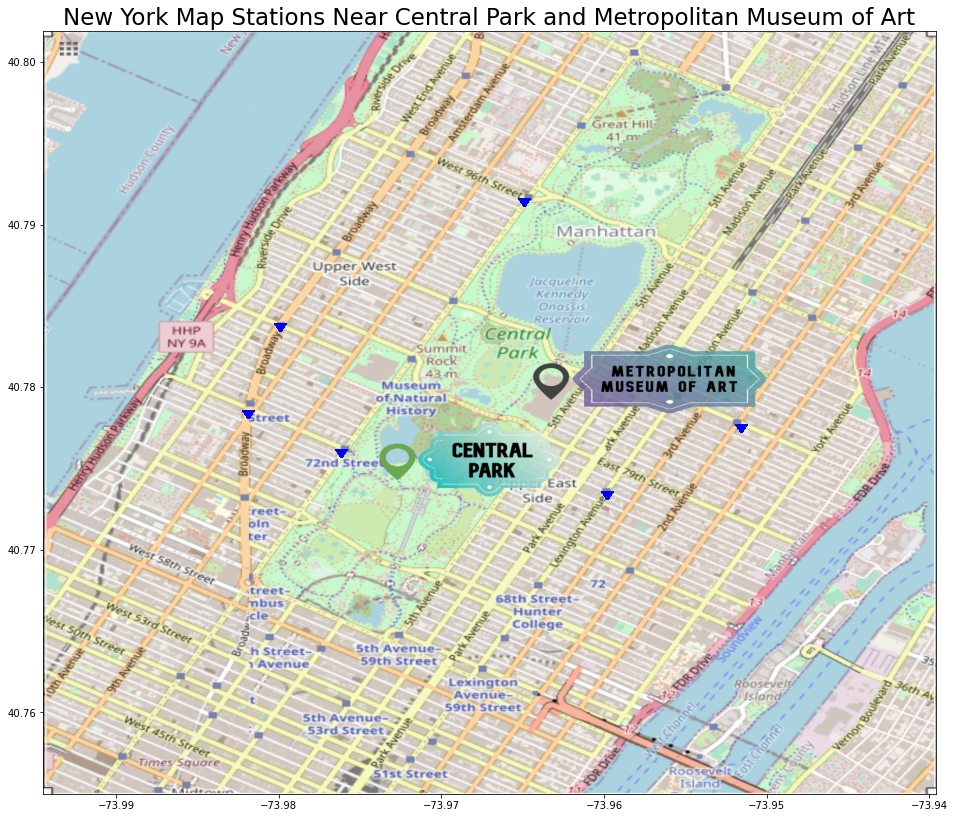

In [159]:
central_map = plt.imread('central_map2.png')
BBox = ((-73.9945, -73.9396, 40.7550, 40.8019))
central_stations = attraction_station_traffic[attraction_station_traffic["ATTRACTION"] == "Central Park"]
museum_stations = attraction_station_traffic[attraction_station_traffic["ATTRACTION"] == "Metropolitan Museum of Art "]
tmp_stations = pd.concat([central_stations, museum_stations], axis=0)
fig, ax = plt.subplots(figsize = (16,18))
ax.scatter(tmp_stations.LON, tmp_stations.LAT, zorder=1, alpha= 1, c='b', s=100, marker=11)
ax.set_title('New York Map Stations Near Central Park and Metropolitan Museum of Art')
ax.title.set_size(23)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(central_map, zorder=0, extent = BBox, aspect= 'equal')

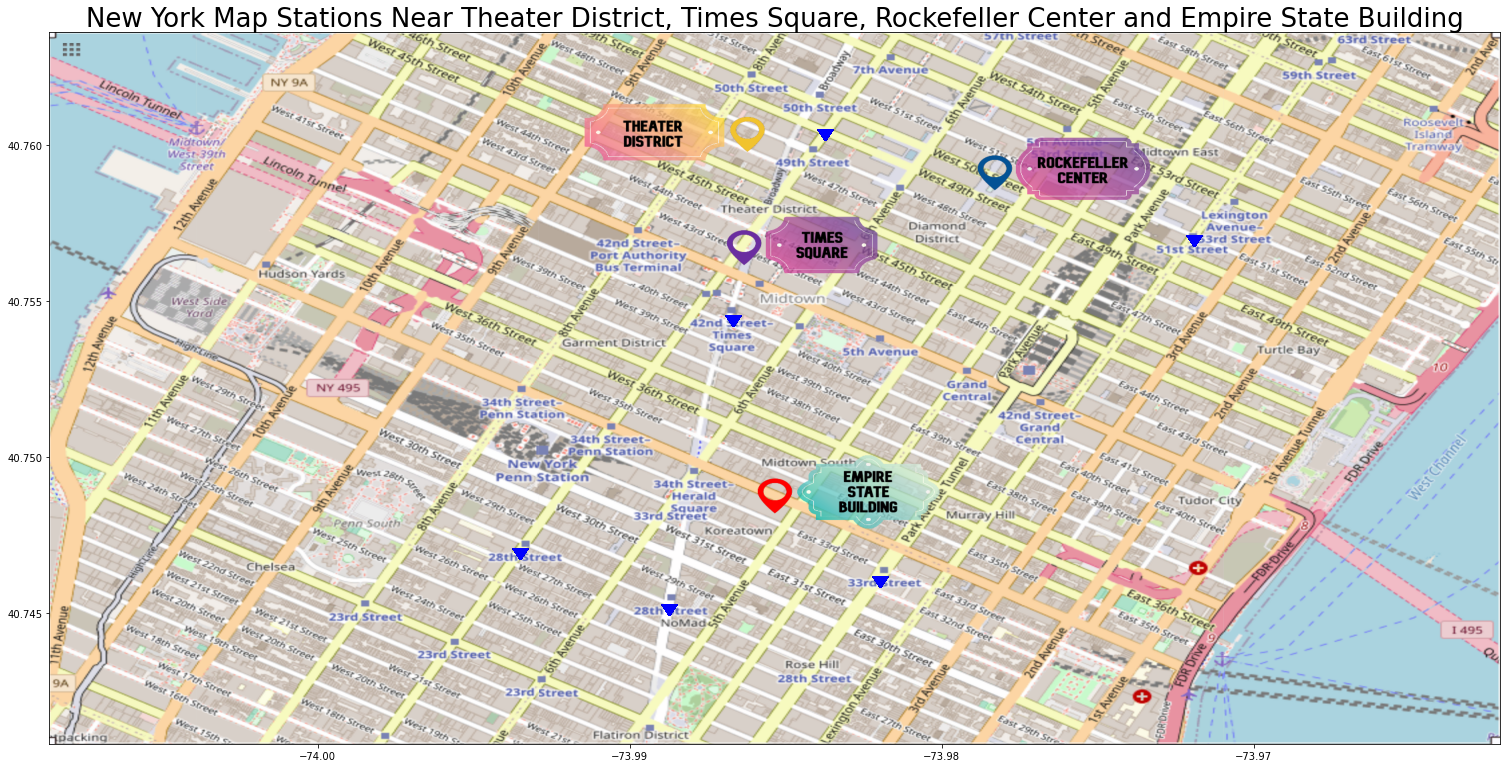

In [162]:
ts_map = plt.imread('ts_map2.png')
BBox = ((-74.0086, -73.9621, 40.7408, 40.7636))
ts_stations = attraction_station_traffic[attraction_station_traffic["ATTRACTION"] == "Times Square"]
rocke_stations = attraction_station_traffic[attraction_station_traffic["ATTRACTION"] == "Rockefeller Center & Top of the Rock Observation Deck"]
empire_stations = attraction_station_traffic[attraction_station_traffic["ATTRACTION"] == "Empire State Building"]
broadway_stations = attraction_station_traffic[attraction_station_traffic["ATTRACTION"] == "Broadway and the Theater District"]
tmp_stations = pd.concat([ts_stations, rocke_stations, empire_stations, broadway_stations], axis=0)
fig, ax = plt.subplots(figsize = (26,28))
ax.scatter(tmp_stations.LON, tmp_stations.LAT, zorder=1, alpha= 1, c='b', s=200, marker=11)
ax.set_title('New York Map Stations Near Theater District, Times Square, Rockefeller Center and Empire State Building')
ax.title.set_size(26)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ts_map, zorder=0, extent = BBox, aspect= 'equal')

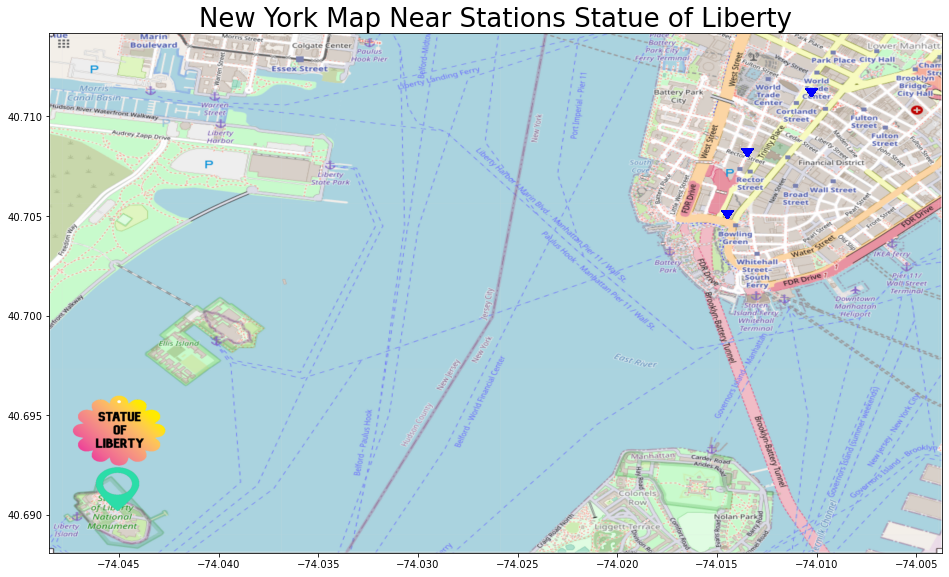

In [164]:
sl_map = plt.imread('sl_map2.png')
BBox = ((-74.0485, -74.0037, 40.6881, 40.7142))
sl_stations = attraction_station_traffic[attraction_station_traffic["ATTRACTION"] == "Statue of Liberty"]
fig, ax = plt.subplots(figsize = (16,18))
ax.scatter(sl_stations.LON, sl_stations.LAT, zorder=1, alpha= 1, c='b', s=100, marker=11)
ax.set_title('New York Map Near Stations Statue of Liberty')
ax.title.set_size(26)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(sl_map, zorder=0, extent = BBox, aspect= 'equal')

### Analysis of Subway Traffic near Landmark Locations

The focus of the data analysis is to find at which areas (where the attractions are) are more crowded at 
what months or weeks specially during the holiday seasons.
Due to our client needs, the subset of the data is turned into days instead or time with specific hours 
during the day. 
For an example as seen on the geographic scatter plot, the red dots represent traffic of stations of an 
area near a specific landmark. As shown above is the Columbus Circle and Coliseum Park

### findings

##### 
The output of the analysis as interprinted in all the above graphs showing the density of how many individuals in each area that has an attraction of New York where the client is going to use those findings to decide the pricing and availability of ticketing in those certain areas. 

after analyzing dataset of MTA’s turnstile data from September to December 2019 it was found out that Central park has the most traffic of all attractions by 38.5% following it the Metropolitan Museum of Art by 28%, so the recommendation to the client is to price them depending on the above foundings traffic on the times where the traffic becomes high, an example would be holiday season as christmas when its shown on the time line graph. 